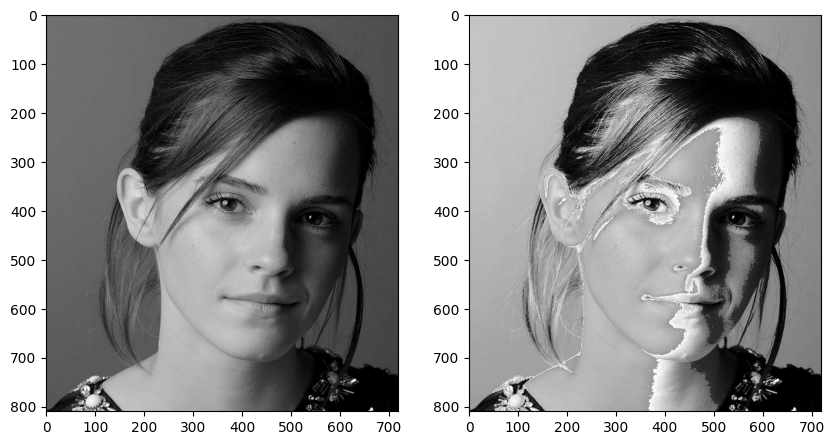

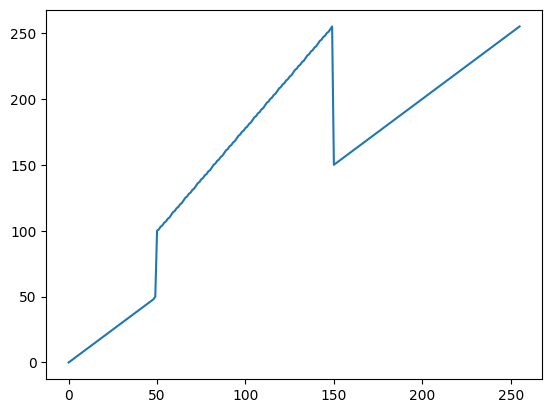

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plyt

img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

tran1 = np.linspace(0, 50, 50).astype(np.uint8)
tran2 = np.linspace(100, 255, 100).astype(np.uint8)
tran3 = np.linspace(150, 255, 106).astype(np.uint8)

tran = np.concatenate((tran1, tran2), axis=0).astype(np.uint8)
tran = np.concatenate((tran, tran3), axis=0).astype(np.uint8)
new_img = tran[img]

fig, ax = plyt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[1].imshow(new_img, cmap='gray', vmin = 0, vmax = 255)

fig, ax = plyt.subplots()
ax.plot(tran)

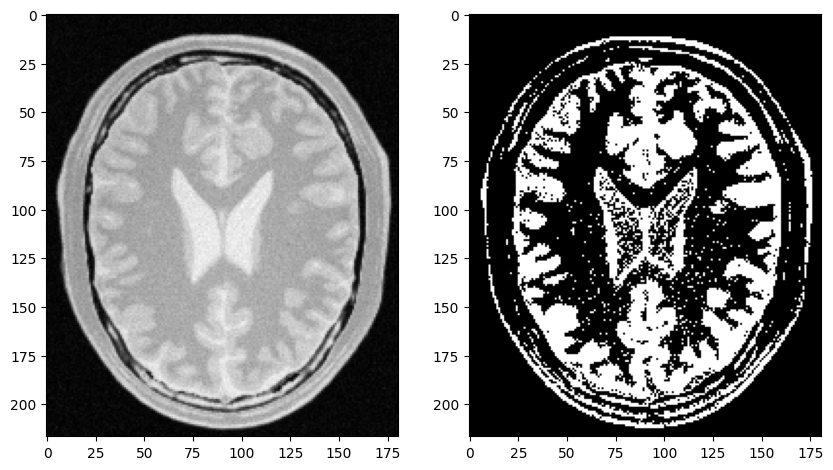

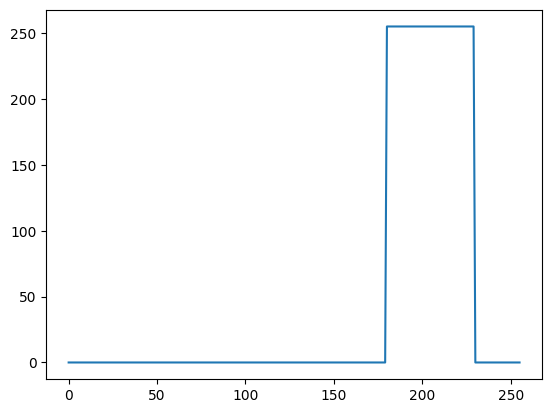

In [17]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

tran1 = np.linspace(0, 0, 180).astype(np.uint8)
tran2 = np.linspace(255, 255, 50).astype(np.uint8)
tran3 = np.linspace(0, 0, 26).astype(np.uint8)

tran = np.concatenate((tran1, tran2), axis=0).astype(np.uint8)
tran = np.concatenate((tran, tran3), axis=0).astype(np.uint8)
new_img = tran[img]

fig, ax = plyt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[1].imshow(new_img, cmap='gray', vmin = 0, vmax = 255)

fig, ax = plyt.subplots()
ax.plot(tran)

In [15]:
img[50,80]

154

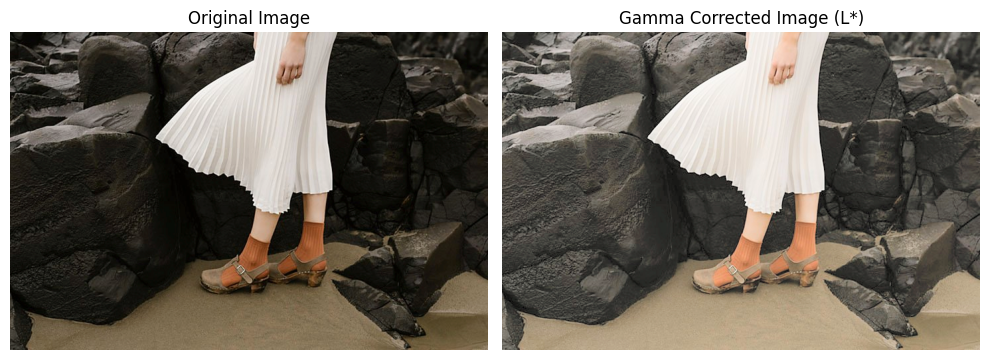

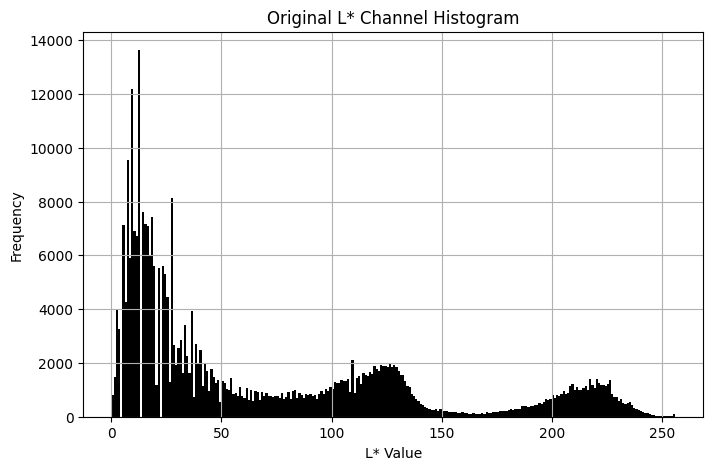

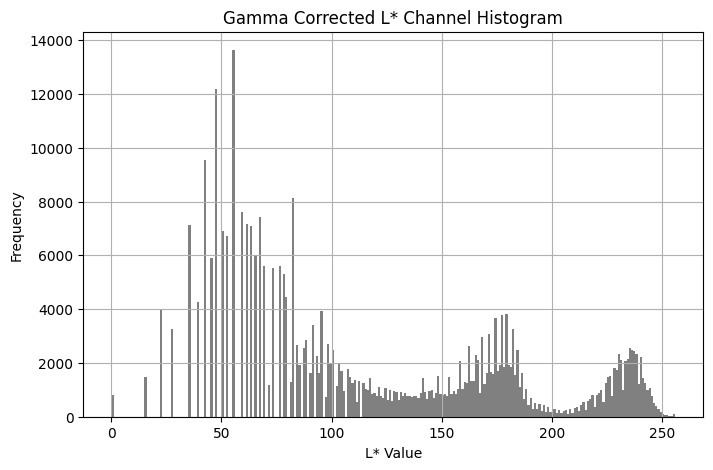

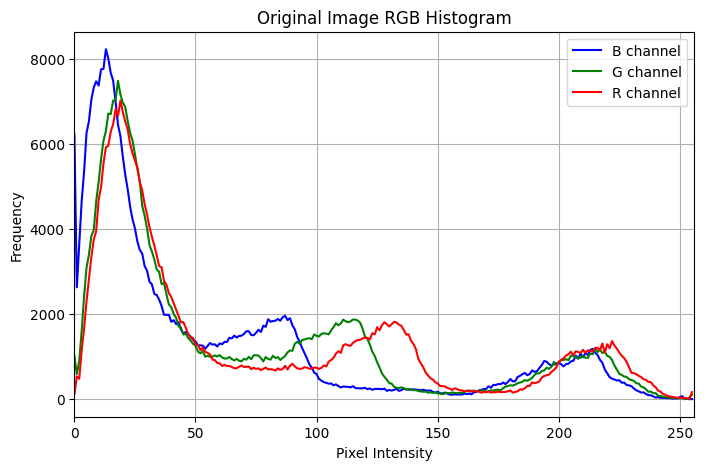

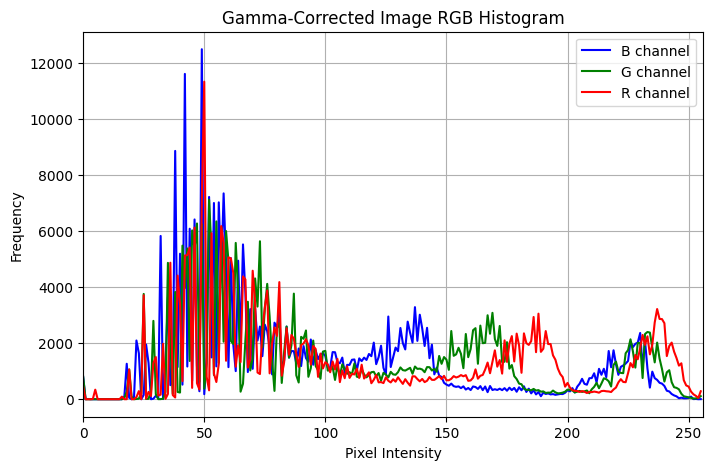

In [26]:
#3 gama for L plane
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/highlights_and_shadows.jpg")
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_lab_origi = img_lab.copy()
l_plane = img_lab[:, :, 0]
l_plane_copy = l_plane.copy()
gamma = 0.5
tran = np.array([(p/255)**gamma * 255 for p in range(0, 256)]).astype(np.uint8)
new_l = tran[l_plane]

img_lab[:, :, 0] = new_l

hist_l_new = cv.calcHist([img_lab], [0], None, [256], [0, 256])
hist_l = cv.calcHist([img_lab_origi], [0], None, [256], [0, 256])

img_gamma_corrected = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)

# Convert img_lab_origi to BGR for original image display
img_original_bgr = cv.cvtColor(img_lab_origi, cv.COLOR_LAB2BGR)

# === DISPLAY IMAGES ===
plyt.figure(figsize=(10, 5))
plyt.subplot(1, 2, 1)
plyt.imshow(cv.cvtColor(img_original_bgr, cv.COLOR_BGR2RGB))
plyt.title("Original Image")
plyt.axis('off')

plyt.subplot(1, 2, 2)
plyt.imshow(cv.cvtColor(img_gamma_corrected, cv.COLOR_BGR2RGB))
plyt.title("Gamma Corrected Image (L*)")
plyt.axis('off')
plyt.tight_layout()
plyt.show()

# === HISTOGRAM: Old and New L* Planes ===
# --- First graph: Original L* histogram ---
plyt.figure(figsize=(8, 5))
plyt.hist(l_plane_copy.ravel(), bins=256, range=[0, 256], color='black')
plyt.title('Original L* Channel Histogram')
plyt.xlabel('L* Value')
plyt.ylabel('Frequency')
plyt.grid()
plyt.show()

# --- Second graph: Gamma-corrected L* histogram ---
plyt.figure(figsize=(8, 5))
plyt.hist(new_l.ravel(), bins=256, range=[0, 256], color='gray')
plyt.title('Gamma Corrected L* Channel Histogram')
plyt.xlabel('L* Value')
plyt.ylabel('Frequency')
plyt.grid()
plyt.show()

# === HISTOGRAM: RGB of Original Image ===
plyt.figure(figsize=(8, 5))
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plyt.plot(hist, color=col, label=f'{col.upper()} channel')
plyt.title('Original Image RGB Histogram')
plyt.xlabel('Pixel Intensity')
plyt.ylabel('Frequency')
plyt.legend()
plyt.grid()
plyt.xlim([0, 256])
plyt.show()

# === HISTOGRAM: RGB of Gamma-Corrected Image ===
plyt.figure(figsize=(8, 5))
for i, col in enumerate(colors):
    hist = cv.calcHist([img_gamma_corrected], [i], None, [256], [0, 256])
    plyt.plot(hist, color=col, label=f'{col.upper()} channel')
plyt.title('Gamma-Corrected Image RGB Histogram')
plyt.xlabel('Pixel Intensity')
plyt.ylabel('Frequency')
plyt.legend()
plyt.grid()
plyt.xlim([0, 256])
plyt.show()

In [27]:
print(l_plane_copy)
print()
print(new_l)

[[  7   7  12 ...  18  23  26]
 [  7   6   8 ...  20  26  27]
 [  7   3   3 ...  23  27  29]
 ...
 [ 36  44  50 ... 120 135 146]
 [ 50  63  70 ... 129 148 152]
 [ 75  84  80 ... 141 150 136]]

[[ 42  42  55 ...  67  76  81]
 [ 42  39  45 ...  71  81  82]
 [ 42  27  27 ...  76  82  85]
 ...
 [ 95 105 112 ... 174 185 192]
 [112 126 133 ... 181 194 196]
 [138 146 142 ... 189 195 186]]
